# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [98]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import scipy.stats as st
from pprint import pprint
from datetime import date

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

In [99]:
print(weather_api_key)

8589f8eb1216e3d8038f67715766d052


### Generate the Cities List by Using the `citipy` Library

In [100]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [101]:
pprint(city_weather)

{'base': 'stations',
 'clouds': {'all': 0},
 'cod': 200,
 'coord': {'lat': 23.6848, 'lon': -15.958},
 'dt': 1697113576,
 'id': 2463447,
 'main': {'feels_like': 303.42,
          'humidity': 35,
          'pressure': 1013,
          'temp': 304.16,
          'temp_max': 304.16,
          'temp_min': 304.16},
 'name': 'Dakhla',
 'sys': {'country': 'EH',
         'id': 2403,
         'sunrise': 1697093968,
         'sunset': 1697136062,
         'type': 1},
 'timezone': 3600,
 'visibility': 8000,
 'weather': [{'description': 'clear sky',
              'icon': '01d',
              'id': 800,
              'main': 'Clear'}],
 'wind': {'deg': 360, 'speed': 4.63}}


In [102]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | verdal
Processing Record 2 of Set 1 | yellowknife
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | afaahiti
Processing Record 5 of Set 1 | 'ohonua
City not found. Skipping...
Processing Record 6 of Set 1 | margaret river
Processing Record 7 of Set 1 | fale old settlement
Processing Record 8 of Set 1 | songea
Processing Record 9 of Set 1 | tiksi
Processing Record 10 of Set 1 | waitangi
Processing Record 11 of Set 1 | bardai
Processing Record 12 of Set 1 | tura
Processing Record 13 of Set 1 | port-aux-francais
Processing Record 14 of Set 1 | saint-pierre
Processing Record 15 of Set 1 | gardez
Processing Record 16 of Set 1 | shibetsu
Processing Record 17 of Set 1 | enewetak
Processing Record 18 of Set 1 | tubarjal
Processing Record 19 of Set 1 | heroica guaymas
Processing Record 20 of Set 1 | barcelos
Processing Record 21 of Set 1 | port elizabeth
Processing Record 22 of Se

In [103]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          595
Lat           595
Lng           595
Max Temp      595
Humidity      595
Cloudiness    595
Wind Speed    595
Country       595
Date          595
dtype: int64

In [104]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,verdal,63.7933,11.4817,281.17,80,95,6.77,NO,1697121802
1,yellowknife,62.4560,-114.3525,280.05,100,100,1.54,CA,1697121802
2,punta arenas,-53.1500,-70.9167,282.21,66,40,10.80,CL,1697121771
3,afaahiti,-17.7500,-149.2833,295.08,76,33,8.28,PF,1697121802
4,margaret river,-33.9500,115.0667,285.76,87,0,5.75,AU,1697121802


In [105]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [106]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,verdal,63.7933,11.4817,281.17,80,95,6.77,NO,1697121802
1,yellowknife,62.4560,-114.3525,280.05,100,100,1.54,CA,1697121802
2,punta arenas,-53.1500,-70.9167,282.21,66,40,10.80,CL,1697121771
3,afaahiti,-17.7500,-149.2833,295.08,76,33,8.28,PF,1697121802
4,margaret river,-33.9500,115.0667,285.76,87,0,5.75,AU,1697121802


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

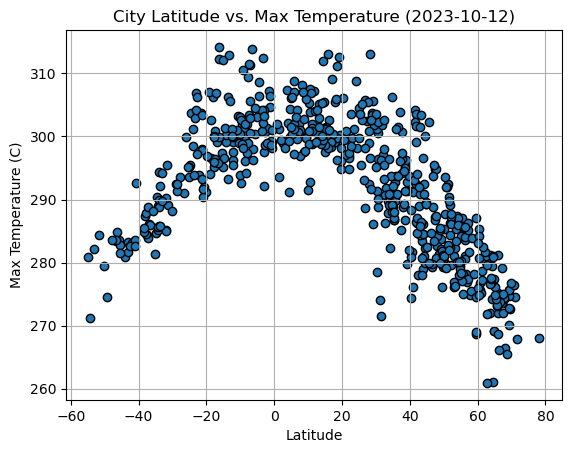

In [107]:
# Create variable for current date to add to title 
# How to get current date in pythong > https://www.programiz.com/python-programming/datetime/current-datetime
today = date.today()
today= today.strftime('%Y-%m-%d')

# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Max Temperature ({today})')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

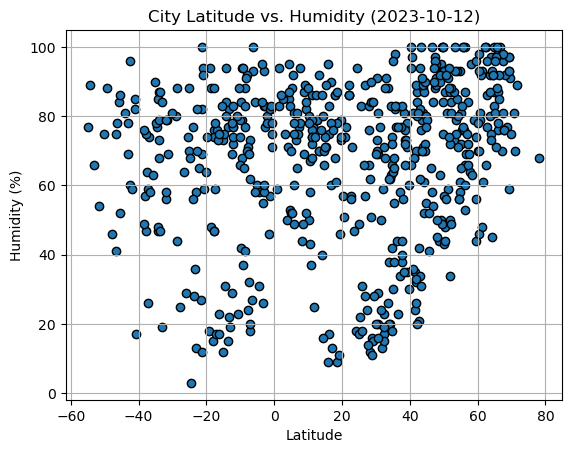

In [108]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Humidity ({today})')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

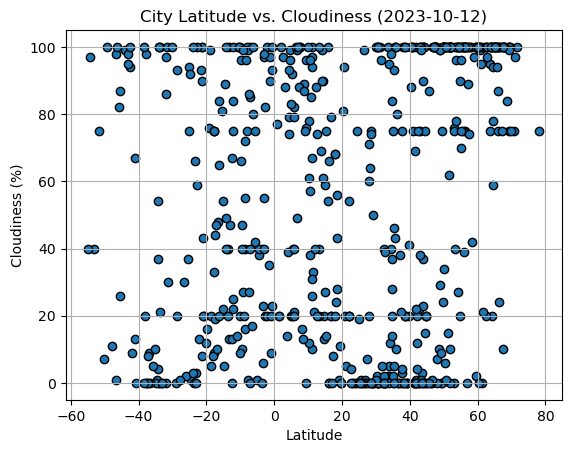

In [109]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Cloudiness ({today})')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

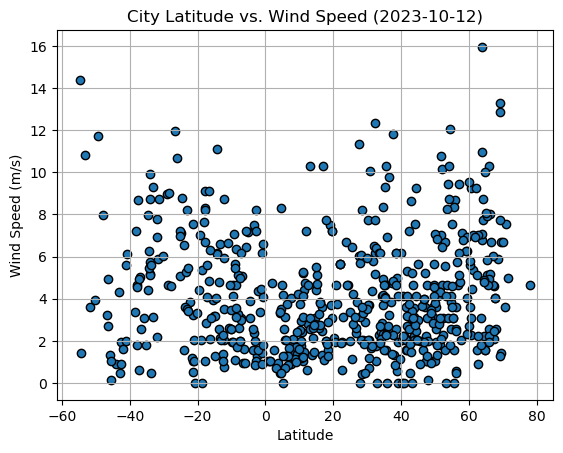

In [110]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', edgecolor='black')

# Incorporate the other graph properties
plt.title(f'City Latitude vs. Wind Speed ({today})')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (m/s)')
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [111]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,verdal,63.7933,11.4817,281.17,80,95,6.77,NO,1697121802
1,yellowknife,62.4560,-114.3525,280.05,100,100,1.54,CA,1697121802
7,tiksi,71.6872,128.8694,267.85,89,100,4.96,RU,1697121802
9,bardai,11.6500,7.2333,307.18,25,21,4.74,NG,1697121802
10,tura,25.5198,90.2201,295.52,83,1,1.14,IN,1697121802


In [112]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,punta arenas,-53.1500,-70.9167,282.21,66,40,10.80,CL,1697121771
3,afaahiti,-17.7500,-149.2833,295.08,76,33,8.28,PF,1697121802
4,margaret river,-33.9500,115.0667,285.76,87,0,5.75,AU,1697121802
5,fale old settlement,-9.3852,-171.2468,301.52,79,10,7.07,TK,1697121802
6,songea,-10.6833,35.6500,303.27,23,100,2.61,TZ,1697121802


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.84


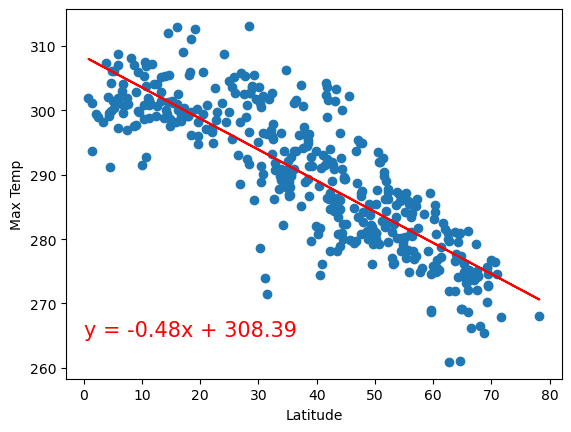

In [113]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
correlation = st.pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0,265),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.82


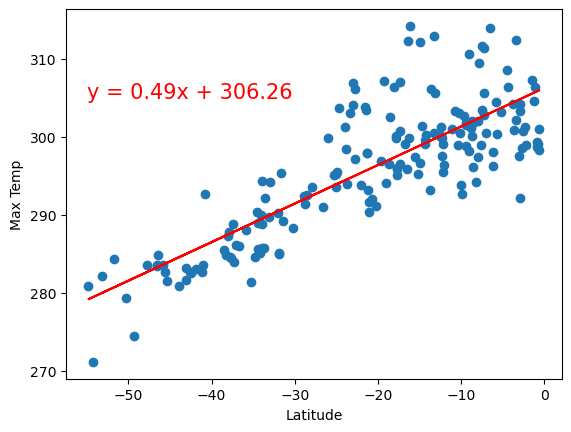

In [114]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
correlation = st.pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-55,305),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.23


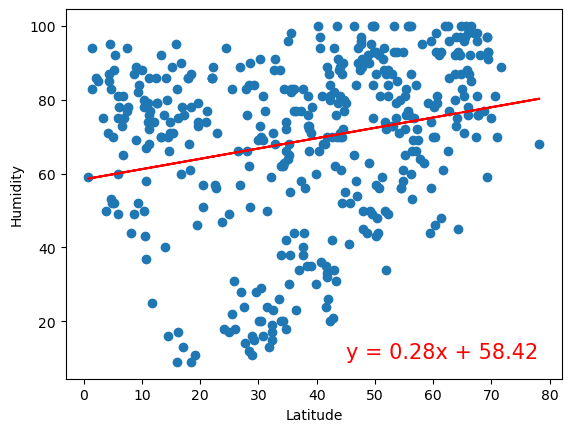

In [115]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
correlation = st.pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: -0.02


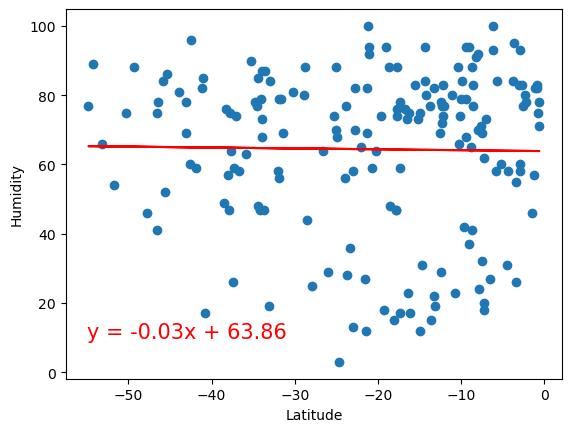

In [117]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
correlation = st.pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-55,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.29


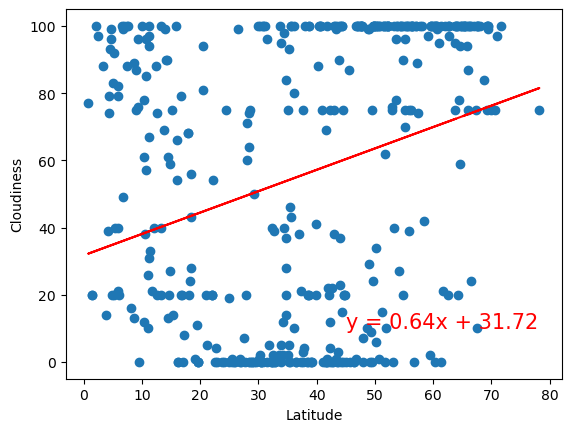

In [118]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
correlation = st.pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(45,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.05


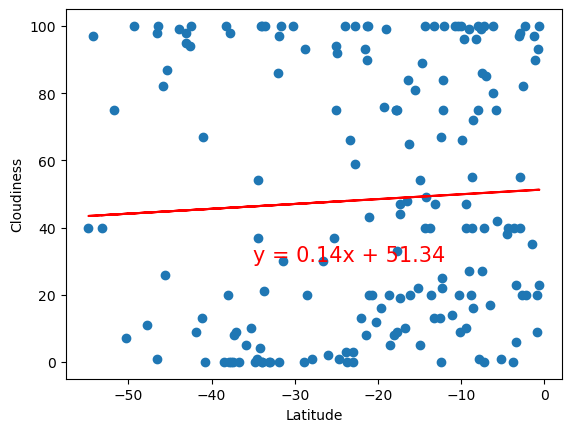

In [119]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
correlation = st.pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-35,30),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.29


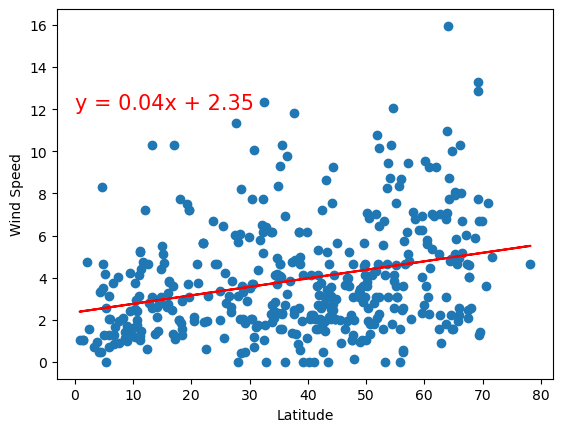

In [120]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
correlation = st.pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(0,12),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.17


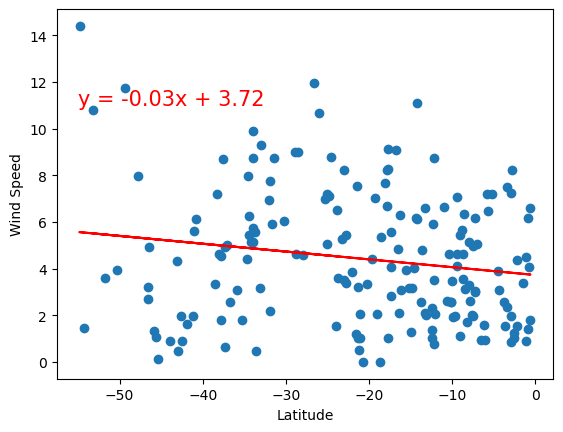

In [121]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
correlation = st.pearsonr(x_values,y_values)
print(f'The r-value is: {round(correlation[0],2)}')

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values,y_values)
regress_values = x_values * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values, regress_values, 'r-')
plt.annotate(line_eq,(-55,11),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE